# <a id='toc1_'></a>[Data Modeling](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [Data Modeling](#toc1_)    
- [Setup](#toc2_)    
- [Model 1: Preparation, Initiation, and Evaluation](#toc3_)    
  - [Model 1: Hypothesis Formation](#toc3_1_)    
  - [Model 1: Assumptions](#toc3_2_)    
  - [Model 1: Initiation](#toc3_3_)    
  - [Model 1: Iteration](#toc3_4_)    
  - [Model 1: Evaluation](#toc3_5_)    
  - [Model 1: Efficiency Evaluation](#toc3_6_)    
  - [Model 1: Assessing Residuals](#toc3_7_)    
- [Key Findings](#toc4_)    
- [Recommendations](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Setup](#toc0_)

In [190]:
# Import all functions and classes from the module named 'my_code'
from custom_functions_and_libraries import *

# Set the random.seed(42)
np.random.seed(42)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# # import warnings
# warnings.filterwarnings('ignore')


# <a id='toc3_'></a>[Model Search](#toc0_)

In this section, we will apply some machine learning models on the data.


## <a id='toc3_1_'></a>[Models: Hypothesis Formation and Assumptions](#toc0_)



## <a id='toc3_3_'></a>[Model Search: Grid Initiation](#toc0_)



Here I created my X train and X test sets and y train and y test sets. 

Practice Classification Models:

In [191]:
# # Import the function to load the digits dataset from sklearn.datasets
# from sklearn.datasets import load_digits

# # Load the digits dataset into a variable called digits
# digits = load_digits()

# # Convert the digits dataset into a pandas DataFrame. The data is contained in digits.data and the column names in digits.feature_names
# df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# # Add a new column to the DataFrame for the target variable. The target values are contained in digits.target
# df['target'] = digits.target

# # Split the digits dataset into a training set and a testing set
# # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
# train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])

# # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
# # .copy() is used to ensure that changes made to X_train do not affect train_df
# X_train = train_df.drop(columns=['target']).copy()

# # Create the target vector for the training set (y_train) which is just the 'target' column from train_df
# y_train = train_df['target'].copy()

# # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
# X_test = test_df.drop(columns=['pixel_0_0']).copy()
# y_test = test_df['target'].copy()

# X_train.shape, y_train.shape, X_test.shape, y_test.shape


Practice Regression Models:

In [192]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Convert the dataset into a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable to the DataFrame
df['MedHouseVal'] = california.target

# Split the dataset into a training set and a testing set
# The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Create the feature matrix for the training set (X_train) by dropping the target column from train_df
# .copy() is used to ensure that changes made to X_train do not affect train_df
X_train = train_df.drop(columns=['MedHouseVal']).copy()

# Create the target vector for the training set (y_train) which is just the 'MedHouseVal' column from train_df
y_train = train_df['MedHouseVal'].copy()

# Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
X_test = test_df.drop(columns=['MedHouseVal']).copy()
y_test = test_df['MedHouseVal'].copy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14448, 8), (14448,), (6192, 8), (6192,))

Create a pipeline for each type of problem.

In [193]:
# advanced_regressor_param_grids[0]

In [194]:
# (Optional) Directory for caching transformers
# cachedir = mkdtemp()

# Define the pipeline steps where each step is a tuple of (name, transform)
# Here, 'None' means that the steps are just placeholders and will be defined in the parameter grid
estimators = [('scaler', None),
            ('feature_selection', None),
            ('dim_reducer', None),
            ('model', None)]

# Create the pipeline object
pipe = Pipeline(estimators) #, memory=cachedir

# Define the advanced models for classification and regression
basic_classifier_models = [LogisticRegression(), SGDClassifier(), DecisionTreeClassifier(), SVC(gamma='auto'), KNeighborsClassifier()]
basic_regression_models = [LinearRegression(), SGDRegressor(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(),  SVR(gamma='auto'), KNeighborsRegressor()]

# Advanced_regression_models
advanced_regression_models = [RandomForestRegressor(), ExtraTreesRegressor(), LGBMRegressor(), CatBoostRegressor(), GradientBoostingRegressor()]

# Advanced_classifier_models
advanced_classifier_models = [RandomForestClassifier(), ExtraTreesClassifier(), LGBMClassifier(), CatBoostClassifier(), GaussianNB()]

# Clustering_models
clustering_models = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(eps=0.5), GaussianMixture(n_components=3)]

# # Time_series_models
# time_series_models = [
#     ARIMA(order=(1, 1, 1)),  # You'll need to determine the appropriate order parameters based on your data
#     SARIMAX(order=(1, 1, 1), seasonal_order=(1, 1, 1, 1)),  # The order and seasonal_order parameters will need to be determined based on your data
#     Prophet(), # Prophet requires a DataFrame with two columns ("ds" and "y"), where "ds" contains the timestamps and "y" contains the values.
#     Sequential().add(LSTM(50))  # LSTM, being a neural network, requires the input to be reshaped to the form [samples, time steps, features]
# ]

In [195]:
index = 3

param_model_list = [basic_classifier_models, basic_regression_models, advanced_classifier_models, advanced_regression_models, clustering_models]


# Define the parameter grid for the Grid Search
# Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
param_grid = [{'scaler': [StandardScaler()],
            'model': param_model_list[index]}]


## <a id='toc3_4_'></a>[Model Search: Fit HalfGrid](#toc0_)



Here I conducted the grid search. To keep track of the time it takes to run each model search, I created a function to time the model's run time. I also created a dataframe to store the results of each model search.

In [196]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=2, n_jobs=-1, scoring='r2')

# Fit the GridSearchCV object to the data - this will perform the actual grid search
grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for grid search: {time_taken} seconds")


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 4816
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 4816
Fitting 3 folds for each of 5 candidates, totalling 15 fits


----------
iter: 1
n_candidates: 2
n_resources: 14448
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Learning rate set to 0.062435
0:	learn: 1.1171668	total: 2.86ms	remaining: 2.86s
1:	learn: 1.0810284	total: 5.93ms	remaining: 2.96s
2:	learn: 1.0475108	total: 8.79ms	remaining: 2.92s
3:	learn: 1.0163402	total: 11.5ms	remaining: 2.86s
4:	learn: 0.9855935	total: 14.2ms	remaining: 2.83s
5:	learn: 0.9578161	total: 17.1ms	remaining: 2.84s
6:	learn: 0.9318010	total: 19.7ms	remaining: 2.8s
7:	learn: 0.9080724	total: 22.4ms	remaining: 2.78s
8:	learn: 0.8855669	total: 25.4ms	remaining: 2.79s
9:	learn: 0.8637215	total: 28ms	remaining: 2.77s
10:	learn: 0.8447114	total: 30.6ms	remaining: 2.75s
11:	learn: 0.8274543	total: 33.3ms	remaining: 2.74s
12:	learn: 0.8118019	total: 36.4ms	remaining: 2.76s
13:	learn: 0.7976687	total: 39.2ms	remaining: 2.76s
14:	learn: 0.7845862	total: 41.9ms	remaining: 2.75s
15:	learn: 0.7714698	total: 44.9ms	remaining: 2.76s
16:	learn: 0.7602680	total: 47.6ms	rem

In [197]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str) if x.dtype == 'object' else x)
display(grid_outcomes)

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,4816,3.181054,0.181531,0.034341,1.886156e-03,RandomForestRegressor(),StandardScaler(),"{'model': RandomForestRegressor(), 'scaler': StandardScaler()}",0.752034,0.761600,0.741912,0.751849,0.008039,7,0.964704,0.964039,0.963943,0.964229,0.000338
1,0,4816,1.081657,0.043506,0.052345,8.180730e-03,ExtraTreesRegressor(),StandardScaler(),"{'model': ExtraTreesRegressor(), 'scaler': StandardScaler()}",0.760354,0.773942,0.758320,0.764205,0.006935,6,1.000000,1.000000,1.000000,1.000000,0.000000
2,0,4816,0.154910,0.015203,0.014337,4.717638e-04,LGBMRegressor(),StandardScaler(),"{'model': LGBMRegressor(), 'scaler': StandardScaler()}",0.789715,0.797891,0.791009,0.792871,0.003588,4,0.930788,0.930554,0.931206,0.930849,0.000270
3,0,4816,3.843665,0.054210,0.008365,2.021728e-03,<catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>, 'scaler': StandardScaler()}",0.816713,0.822019,0.796512,0.811748,0.010989,3,0.948384,0.949342,0.950053,0.949259,0.000684
4,0,4816,1.065197,0.057727,0.004001,1.123916e-07,GradientBoostingRegressor(),StandardScaler(),"{'model': GradientBoostingRegressor(), 'scaler': StandardScaler()}",0.778997,0.780166,0.753166,0.770776,0.012461,5,0.830845,0.835499,0.830318,0.832221,0.002328
5,1,14448,0.189375,0.004991,0.033008,8.170215e-04,LGBMRegressor(),StandardScaler(),"{'model': LGBMRegressor(), 'scaler': StandardScaler()}",0.826011,0.832195,0.823345,0.827184,0.003707,2,0.896894,0.894898,0.896090,0.895961,0.000820
6,1,14448,3.285182,0.068855,0.013003,2.160936e-03,<catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>, 'scaler': StandardScaler()}",0.838684,0.847124,0.837489,0.841099,0.004288,1,0.925925,0.920867,0.923896,0.923563,0.002078


In [198]:
# Sort the DataFrame based on the mean test score and select the top 3
top3 = grid_outcomes.sort_values('rank_test_score').head(3)

# Pivot the DataFrame so the models are the columns and the parameters/scores are the rows
top3 = top3.set_index('rank_test_score')

# Display the DataFrame
display(top3)


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,,
1,1,14448,3.285182,0.068855,0.013003,0.002161,<catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>, 'scaler': StandardScaler()}",0.838684,0.847124,0.837489,0.841099,0.004288,0.925925,0.920867,0.923896,0.923563,0.002078
2,1,14448,0.189375,0.004991,0.033008,0.000817,LGBMRegressor(),StandardScaler(),"{'model': LGBMRegressor(), 'scaler': StandardScaler()}",0.826011,0.832195,0.823345,0.827184,0.003707,0.896894,0.894898,0.896090,0.895961,0.000820
3,0,4816,3.843665,0.054210,0.008365,0.002022,<catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>, 'scaler': StandardScaler()}",0.816713,0.822019,0.796512,0.811748,0.010989,0.948384,0.949342,0.950053,0.949259,0.000684


In [199]:
# Filter the columns based on the regex pattern
filtered_columns = top3.filter(regex=r'^param_', axis=1).columns

# Parameters of the best model
results1 = top3.loc[:, filtered_columns].sort_index().to_dict()


# Append the other results to the list
results2 = {
    'score_method': grid.scoring,
    'train_score_average': top3.loc[: , 'mean_train_score'],
    'validation_score_average': top3.loc[:, 'mean_test_score'],
    'test_score_actual': grid.score(X_test, y_test),
    'n_splits': grid.n_splits_,
    'mean_fit_time': top3.loc[:, 'mean_fit_time'],
    'mean_score_time': top3.loc[:, 'mean_score_time'],
    'refit_time': grid.refit_time_,
    'total_search_time': time_taken
}

results1.update(results2)

# Convert the results to a DataFrame
best_model_results = pd.DataFrame(results1)

best_model_results #.plot(kind='bar', y=['train_score_average', 'validation_score_average', 'test_score_actual'], figsize=(10, 6))

{'param_model': {1: '<catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>',
  2: 'LGBMRegressor()',
  3: '<catboost.core.CatBoostRegressor object at 0x000001D349D2C5E0>'},
 'param_scaler': {1: 'StandardScaler()',
  2: 'StandardScaler()',
  3: 'StandardScaler()'}}

## <a id='toc3_5_'></a>[Model Search: Evaluation of all Models](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [201]:
print(grid_outcomes.columns)


Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


In [202]:
first_hyperparameter = 'param_model'
# second_hyperparameter = 'param_scaler'
pipe_plot_name = 'model'


grid_outcomes.groupby(first_hyperparameter)

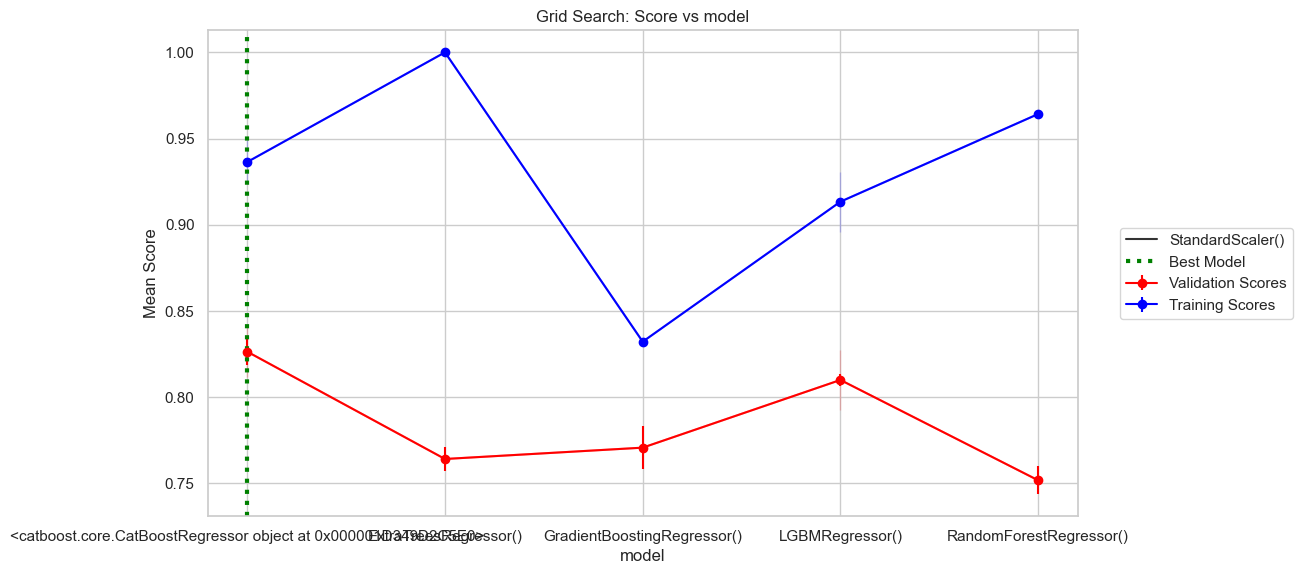

In [203]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                variable_plot_name=pipe_plot_name, second_hyperparameter=second_hyperparameter)


In [204]:
# Using the function
evaluate_linear_model(best_model, X_test, y_test, plot=True)



,Scores
R^2,0.850366
Adjusted R^2,0.850172
MAE,0.292467
MSE,0.196401
RMSE,0.443171
Explained Variance,0.850382


R^2                   0.850366
Adjusted R^2          0.850172
MAE                   0.292467
MSE                   0.196401
RMSE                  0.443171
Explained Variance    0.850382
dtype: float64

In [205]:
# evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)



## <a id='toc3_6_'></a>[Model 1: Efficiency Evaluation](#toc0_)




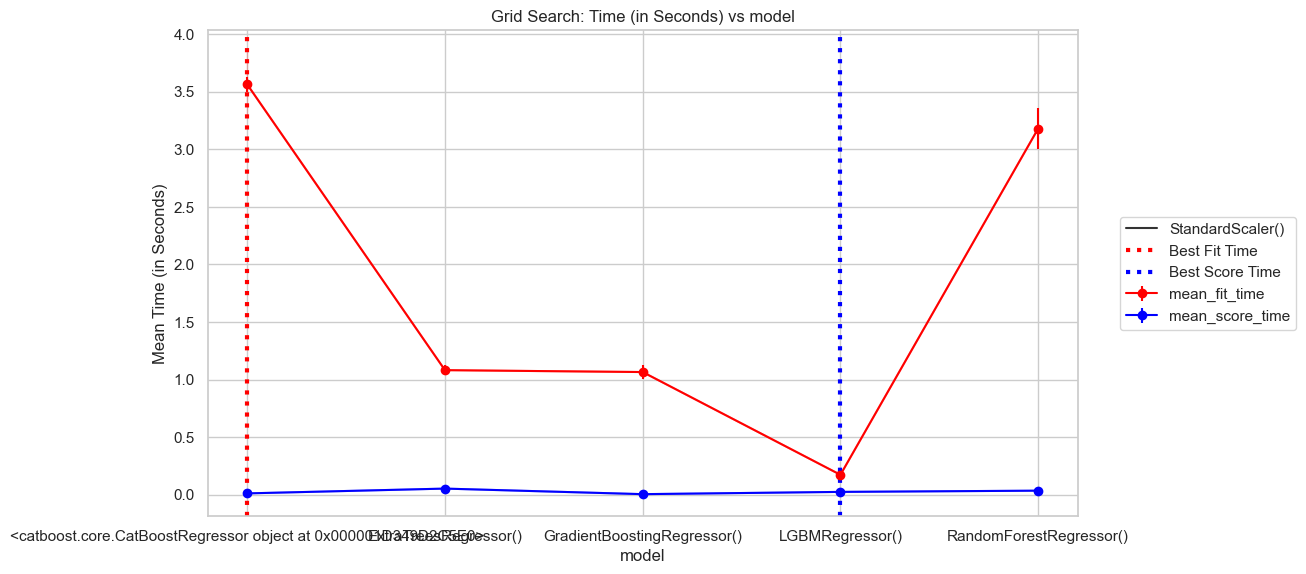

In [206]:
plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, pipe_plot_name, second_hyperparameter=second_hyperparameter)

## <a id='toc3_7_'></a>[Model 1: Assessing Residuals](#toc0_)


**Independence and Identically Distributed Test**

<Figure size 1200x600 with 0 Axes>

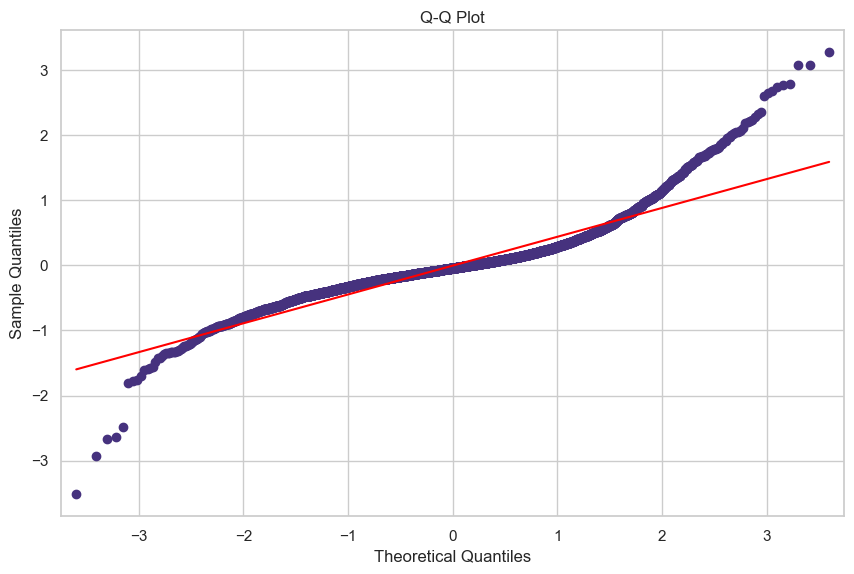

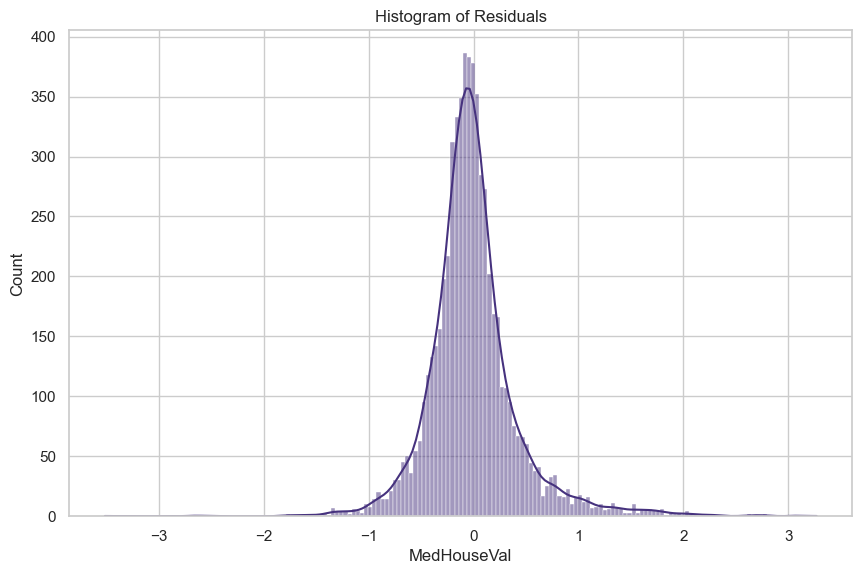

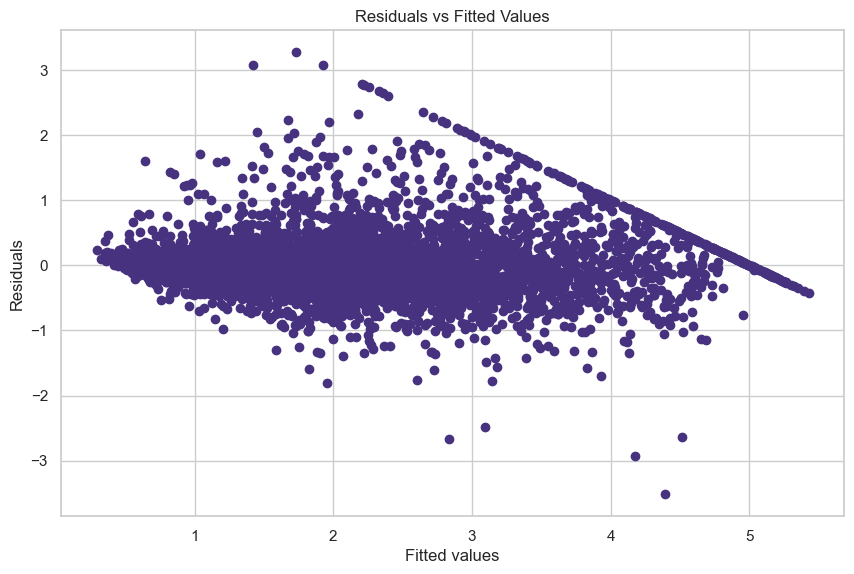

<Figure size 900x600 with 0 Axes>

In [207]:
plot_regression_residuals(best_model, X_test, y_test)

# plot_classifier_residuals(best_model, X_test, y_test, True)

These two visual tests show that the distribution of the residuals is normally distributed and appears to be independent of the fitted values. Furthermore, the Durbin-Watson of the residuals is close to 2, which indicates that there is very little to no autocorrelation in the residuals. Therefore we can conclude that the residuals are not correlated with each other and the distribution of the residuals is not dependent on the predicted probability of the target class. This means that this model meets the assumption of independence and identically distributed. 



## Final Model Tuning

### Final Model Hyperparameter Tuning

In [285]:
advanced_regression_param_grids[3]['scaler'] = [StandardScaler()]
param_grid = advanced_regression_param_grids[3]
param_grid

{'model': [<catboost.core.CatBoostRegressor at 0x1d34b45c250>],
 'model__learning_rate': [0.01, 0.05, 0.1],
 'model__iterations': [500, 1000],
 'model__depth': [5, 7, 10],
 'scaler': [StandardScaler()]}

In [286]:
param_grid = {'model': [CatBoostRegressor()],
        'model__learning_rate': [0.05],
        'model__iterations': [1000],
        'model__depth': [6, 7, 8, 9, 10],
        'scaler': [StandardScaler()]}

In [287]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=5, refit=True, verbose=2, n_jobs=-1, scoring='r2')

# Fit the GridSearchCV object to the data - this will perform the actual grid search
grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for grid search: {time_taken} seconds")


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 4816
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 4816
Fitting 5 folds for each of 5 candidates, totalling 25 fits


----------
iter: 1
n_candidates: 2
n_resources: 14448
Fitting 5 folds for each of 2 candidates, totalling 10 fits
0:	learn: 1.1246724	total: 4.06ms	remaining: 4.06s
1:	learn: 1.0951037	total: 7.65ms	remaining: 3.82s
2:	learn: 1.0655325	total: 11.3ms	remaining: 3.77s
3:	learn: 1.0380466	total: 14.7ms	remaining: 3.67s
4:	learn: 1.0117784	total: 18.1ms	remaining: 3.6s
5:	learn: 0.9870699	total: 21.8ms	remaining: 3.62s
6:	learn: 0.9642970	total: 25.2ms	remaining: 3.57s
7:	learn: 0.9424215	total: 28.6ms	remaining: 3.55s
8:	learn: 0.9223615	total: 32.6ms	remaining: 3.59s
9:	learn: 0.9014898	total: 36ms	remaining: 3.56s
10:	learn: 0.8843905	total: 39.8ms	remaining: 3.58s
11:	learn: 0.8668780	total: 43.2ms	remaining: 3.56s
12:	learn: 0.8504730	total: 46.9ms	remaining: 3.56s
13:	learn: 0.8330133	total: 50.8ms	remaining: 3.58s
14:	learn: 0.8195837	total: 54.3ms	remaining: 3.57s
15:	learn: 0.8066446	total: 57.8ms	remaining: 3.56s
16:	learn: 0.7945092	total: 61.4ms	remaining: 3.55s
17:	learn: 0.78

In [288]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str) if x.dtype == 'object' else x)
display(grid_outcomes.sort_values('rank_test_score').head())

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__depth,param_model__iterations,param_model__learning_rate,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,1,14448,12.044896,1.765849,0.016404,0.005679,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.847139,0.837071,0.850612,0.847903,0.843520,0.845249,0.004674,1,0.926859,0.927559,0.924280,0.927693,0.925741,0.926426,0.001277
6,1,14448,10.788741,2.041164,0.026006,0.017243,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,6,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 6, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.842494,0.831638,0.849610,0.846025,0.839868,0.841927,0.006103,2,0.910536,0.912147,0.909091,0.911385,0.909841,0.910600,0.001083
0,0,4816,9.928138,0.262108,0.025843,0.011104,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,6,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 6, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.851402,0.791028,0.839114,0.822379,0.839653,0.828715,0.020990,3,0.946012,0.948160,0.948917,0.944161,0.944847,0.946419,0.001844
1,0,4816,13.550236,0.587107,0.038209,0.009110,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.850032,0.790614,0.839090,0.823074,0.835817,0.827725,0.020450,4,0.961588,0.963254,0.964033,0.959179,0.960618,0.961735,0.001754
2,0,4816,23.130622,3.616411,0.097222,0.026849,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,8,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 8, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.848988,0.783876,0.841869,0.820607,0.837772,0.826622,0.023326,5,0.973606,0.974295,0.975547,0.972750,0.973189,0.973877,0.000978


In [289]:
# Sort the DataFrame based on the mean test score and select the top 3
top3 = grid_outcomes.sort_values('rank_test_score').head(3)

# Pivot the DataFrame so the models are the columns and the parameters/scores are the rows
top3 = top3.set_index('rank_test_score')

# Display the DataFrame
display(top3)


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__depth,param_model__iterations,param_model__learning_rate,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,14448,12.044896,1.765849,0.016404,0.005679,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.847139,0.837071,0.850612,0.847903,0.843520,0.845249,0.004674,0.926859,0.927559,0.924280,0.927693,0.925741,0.926426,0.001277
2,1,14448,10.788741,2.041164,0.026006,0.017243,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,6,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 6, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.842494,0.831638,0.849610,0.846025,0.839868,0.841927,0.006103,0.910536,0.912147,0.909091,0.911385,0.909841,0.910600,0.001083
3,0,4816,9.928138,0.262108,0.025843,0.011104,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,6,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001D347521460>, 'model__depth': 6, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.851402,0.791028,0.839114,0.822379,0.839653,0.828715,0.020990,0.946012,0.948160,0.948917,0.944161,0.944847,0.946419,0.001844


In [290]:
# Filter the columns based on the regex pattern
filtered_columns = top3.filter(regex=r'^param_', axis=1).columns

# Parameters of the best model
results1 = top3.loc[:, filtered_columns].sort_index().to_dict()


# Append the other results to the list
results2 = {
    'score_method': grid.scoring,
    'train_score_average': top3.loc[: , 'mean_train_score'],
    'validation_score_average': top3.loc[:, 'mean_test_score'],
    'test_score_actual': grid.score(X_test, y_test),
    'n_splits': grid.n_splits_,
    'mean_fit_time': top3.loc[:, 'mean_fit_time'],
    'mean_score_time': top3.loc[:, 'mean_score_time'],
    'refit_time': grid.refit_time_,
    'total_search_time': time_taken
}

results1.update(results2)

# Convert the results to a DataFrame
best_model_results = pd.DataFrame(results1)

best_model_results.T #.plot(kind='bar', y=['train_score_average', 'validation_score_average', 'test_score_actual'], figsize=(10, 6))

,1,2,3
param_model,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,<catboost.core.CatBoostRegressor object at 0x000001D347521460>,<catboost.core.CatBoostRegressor object at 0x000001D347521460>
param_model__depth,7,6,6
param_model__iterations,1000,1000,1000
param_model__learning_rate,0.05,0.05,0.05
param_scaler,StandardScaler(),StandardScaler(),StandardScaler()
score_method,r2,r2,r2
train_score_average,0.926426,0.9106,0.946419
validation_score_average,0.845249,0.841927,0.828715
test_score_actual,0.852174,0.852174,0.852174
n_splits,5,5,5


## <a id='toc3_5_'></a>[Final Model Tuning: Evaluation of Hyperparameters](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [291]:
print(grid_outcomes.columns)


Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model',
       'param_model__depth', 'param_model__iterations',
       'param_model__learning_rate', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


In [292]:
first_hyperparameter = 'param_model__depth'
second_hyperparameter = None
pipe_plot_name = 'param_model__depth'


grid_outcomes.groupby(first_hyperparameter)

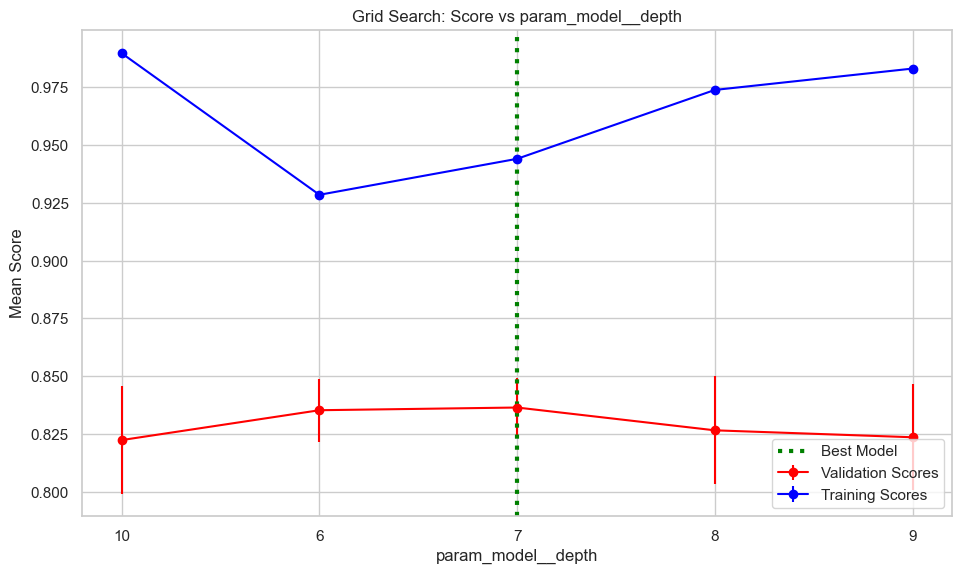

In [293]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                variable_plot_name=pipe_plot_name, second_hyperparameter=second_hyperparameter)


In [294]:
# Using the function
evaluate_linear_model(best_model, X_test, y_test, plot=True)



,Scores
R^2,0.852174
Adjusted R^2,0.851983
MAE,0.290649
MSE,0.194027
RMSE,0.440485
Explained Variance,0.852188


R^2                   0.852174
Adjusted R^2          0.851983
MAE                   0.290649
MSE                   0.194027
RMSE                  0.440485
Explained Variance    0.852188
dtype: float64

In [295]:
# evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)



<Figure size 1200x600 with 0 Axes>

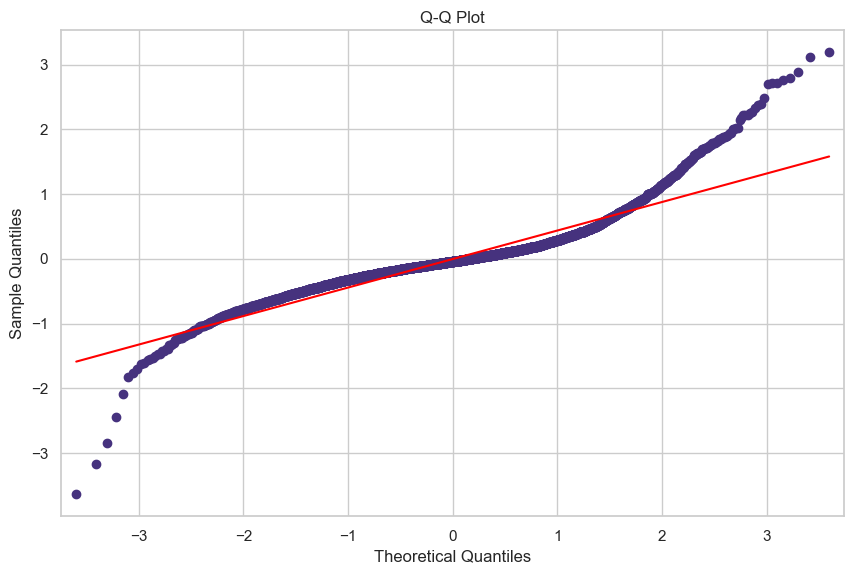

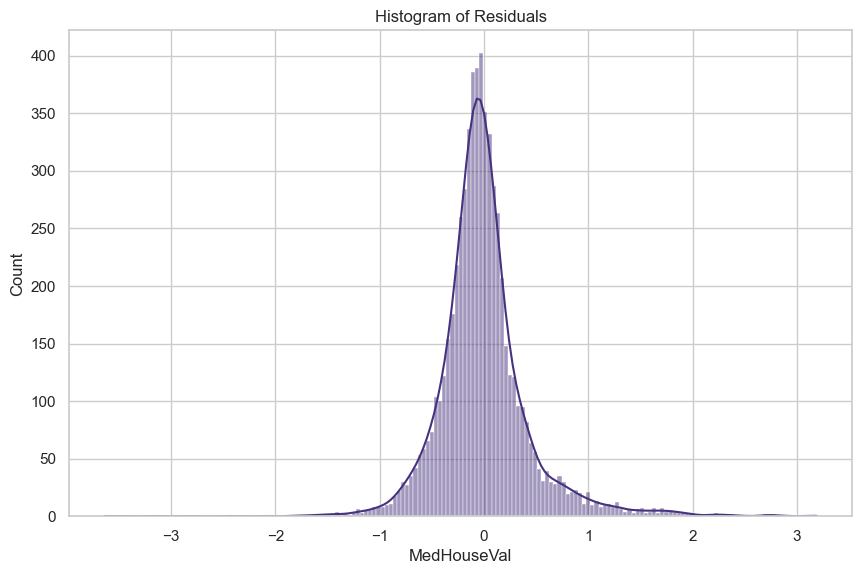

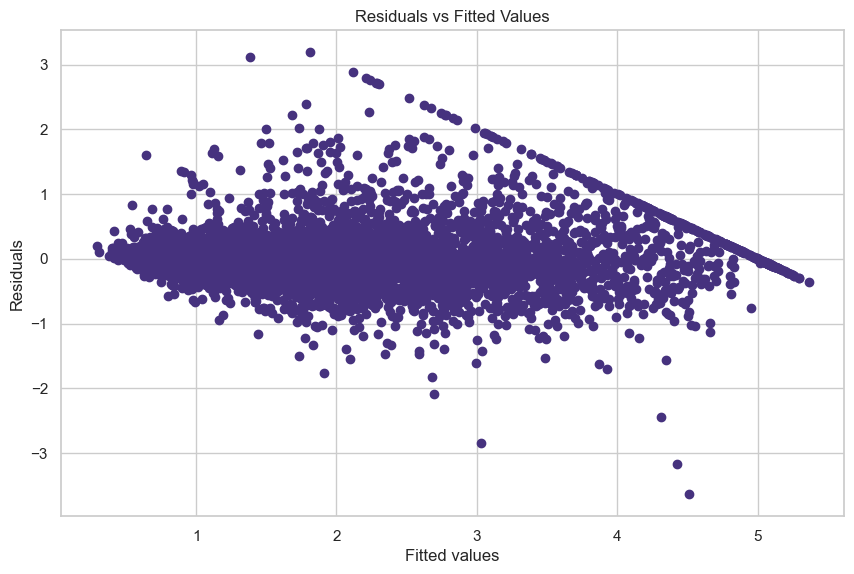

<Figure size 900x600 with 0 Axes>

In [296]:
plot_regression_residuals(best_model, X_test, y_test)

# <a id='toc4_'></a>[Key Findings](#toc0_)

Summarize the findings from the analyses.



# <a id='toc5_'></a>[Recommendations](#toc0_)

List number of actionables based on the findings.

### Reference for other parameter grids

In [297]:
# Parameter grid for LinearRegression
param_grid_linreg = {
    'model': [LinearRegression()],
    # Linear Regression does not really have any hyperparameters
}

# Parameter grid for SGDRegressor
param_grid_sgdreg = {
    'model': [SGDRegressor()],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Parameter grid for Ridge
param_grid_ridge = {
    'model': [Ridge()],
    'model__alpha': np.logspace(-4, 4, 20)
}

# Parameter grid for Lasso
param_grid_lasso = {
    'model': [Lasso()],
    'model__alpha': np.logspace(-4, 4, 20)
}

# Parameter grid for ElasticNet
param_grid_elasticnet = {
    'model': [ElasticNet()],
    'model__alpha': np.logspace(-4, 4, 20),
    'model__l1_ratio': np.linspace(0, 1, 10)
}

# Parameter grid for DecisionTreeRegressor
param_grid_dtr = {
    'model': [DecisionTreeRegressor()],
    'model__criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVR
param_grid_svr = {
    'model': [SVR()],
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsRegressor
param_grid_knr = {
    'model': [KNeighborsRegressor()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_regression_param_grids = [param_grid_linreg, param_grid_sgdreg, param_grid_ridge, param_grid_lasso, param_grid_elasticnet, param_grid_dtr, param_grid_svr, param_grid_knr]


In [298]:
# Parameter grid for LogisticRegression
param_grid_logreg = {
    'model': [LogisticRegression()],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': np.logspace(-4, 4, 20)
}

# Parameter grid for SGDClassifier
param_grid_sgd = {
    'model': [SGDClassifier()],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Parameter grid for DecisionTreeClassifier
param_grid_dtc = {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVC
param_grid_svc = {
    'model': [SVC()],
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsClassifier
param_grid_knc = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_classifier_param_grids = [param_grid_logreg, param_grid_sgd, param_grid_dtc, param_grid_svc, param_grid_knc]


In [299]:
# Parameter grid for KMeans
param_grid_kmeans = {
    'model': [KMeans()],
    'model__n_clusters': [2, 3, 4, 5],
    'model__init': ['k-means++', 'random'],
    'model__n_init': [10, 20]
}

# Parameter grid for AgglomerativeClustering
param_grid_aggc = {
    'model': [AgglomerativeClustering()],
    'model__n_clusters': [2, 3, 4, 5],
    'model__linkage': ['ward', 'complete', 'average', 'single']
}

# Parameter grid for DBSCAN
param_grid_dbscan = {
    'model': [DBSCAN()],
    'model__eps': [0.3, 0.5, 0.7],
    'model__min_samples': [5, 10, 15]
}

# Parameter grid for GaussianMixture
param_grid_gmm = {
    'model': [GaussianMixture()],
    'model__n_components': [2, 3, 4, 5],
    'model__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Combine all parameter grids into a list
clustering_param_grids = [param_grid_kmeans, param_grid_aggc, param_grid_dbscan, param_grid_gmm]


In [300]:
# Parameter grid for RandomForestClassifier
param_grid_rfc = {
    'model': [RandomForestClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for ExtraTreesClassifier
param_grid_etc = {
    'model': [ExtraTreesClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for LGBMClassifier
param_grid_lgbmc = {
    'model': [LGBMClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostClassifier
param_grid_catboostc = {
    'model': [CatBoostClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__iterations': [500, 1000],
    'model__depth': [5, 7, 10]
}

# Parameter grid for GaussianNB
param_grid_gnb = {
    'model': [GaussianNB()]  # no hyperparameters to tune
}

# Combine all parameter grids into a list
advanced_classifier_param_grids = [param_grid_rfc, param_grid_etc, param_grid_lgbmc, param_grid_catboostc, param_grid_gnb]


In [301]:
# Parameter grid for RandomForestRegressor
param_grid_rfr = {
    'model': [RandomForestRegressor()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for ExtraTreesRegressor
param_grid_etr = {
    'model': [ExtraTreesRegressor()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for LGBMRegressor
param_grid_lgbm = {
    'model': [LGBMRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostRegressor
param_grid_catboost = {
    'model': [CatBoostRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__iterations': [500, 1000],
    'model__depth': [5, 7, 10]
}

# Parameter grid for GradientBoostingRegressor
param_grid_gbr = {
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__max_depth': [None, 3, 5, 7]
}

# Combine all parameter grids into a list
advanced_regression_param_grids = [param_grid_rfr, param_grid_etr, param_grid_lgbm, param_grid_catboost, param_grid_gbr]


In [302]:

# Basic classifier parameter grids
basic_classifier_param_grids

# Advanced classifier parameter grids
advanced_classifier_param_grids

# Basic regressor parameter grids
basic_regression_param_grids

# Advanced regressor parameter grids
advanced_regression_param_grids

# Clustering parameter grids
clustering_param_grids

[{'model': [KMeans()],
  'model__n_clusters': [2, 3, 4, 5],
  'model__init': ['k-means++', 'random'],
  'model__n_init': [10, 20]},
 {'model': [AgglomerativeClustering()],
  'model__n_clusters': [2, 3, 4, 5],
  'model__linkage': ['ward', 'complete', 'average', 'single']},
 {'model': [DBSCAN()],
  'model__eps': [0.3, 0.5, 0.7],
  'model__min_samples': [5, 10, 15]},
 {'model': [GaussianMixture()],
  'model__n_components': [2, 3, 4, 5],
  'model__covariance_type': ['full', 'tied', 'diag', 'spherical']}]